In [1]:
!pip install pandas

In [13]:
! pip install pandas

In [15]:
! pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.0 kB 991.0 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.0 kB 751.6 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/250.0 kB 984.6 kB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd  
import numpy as np
import torch 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
import torch.nn as nn

In [88]:
#  
file_path = 'D:/Location/workspace/conda/project/xyz.xlsx'  
df = pd.read_excel(file_path)  
  
# 从DataFrame中提取x, y, z列的数据  
x_data = df['x'].values  
y_data = df['y'].values  
z_data = df['z'].values 

#对数据进行归一化处理
def normalize_data(data):  
    """  
    对给定的NumPy数组进行归一化处理  
      
    参数:  
    data (np.ndarray): 需要归一化的NumPy数组  
      
    返回:  
    np.ndarray: 归一化后的NumPy数组  
    """  
    min_val = np.min(data)  
    max_val = np.max(data)  
    # 防止除以零的情况（虽然在实际应用中这种情况很罕见）  
    eps = 1e-8  
    normalized_data = (data - min_val) / (max_val - min_val + eps)  
    return normalized_data  
  
# 假设 x_data, y_data, z_data 是您要归一化的 NumPy 数组  
x_data = df['x'].values  
y_data = df['y'].values  
z_data = df['z'].values 
  
# 使用定义的函数进行归一化  
normalized_x_data = normalize_data(x_data)  
normalized_y_data = normalize_data(y_data)  
normalized_z_data = normalize_data(z_data)  

# 将NumPy数组转换为PyTorch张量，并指定数据类型为float64
x_tensor = torch.from_numpy(normalized_x_data)  
y_tensor = torch.from_numpy(normalized_y_data)  
z_tensor = torch.from_numpy(normalized_z_data)
  
# 将x, y, z堆叠成一个形状为(num_points, 3)的NumPy数组  
coordinates_np = np.stack((x_data, y_data, z_data), axis=1)  
# NumPy数组转换为PyTorch张量  
coordinates_tensor = torch.from_numpy(coordinates_np).float()  
  
# 现在coordinates_tensor是一个形状为(num_points, 3)的二维张量  
# 其中每一行代表一个时间点的(x, y, z)坐标  
  
# 打印前几个坐标点来验证数据  
print(coordinates_tensor[:10])  

tensor([[0.0000, 0.0000, 0.0000],
        [0.0070, 0.0070, 0.0009],
        [0.0211, 0.0211, 0.0028],
        [0.0422, 0.0422, 0.0057],
        [0.0703, 0.0703, 0.0095],
        [0.1055, 0.1055, 0.0143],
        [0.1478, 0.1478, 0.0200],
        [0.1971, 0.1971, 0.0266],
        [0.2534, 0.2534, 0.0342],
        [0.3168, 0.3168, 0.0428]])


In [89]:
# create train/test split
train_coordinates, test_coordinates = train_test_split(coordinates_np, test_size=0.2, random_state=42) 

train_coordinates_tensor = torch.from_numpy(train_coordinates).float()
test_coordinates_tensor = torch.from_numpy(test_coordinates).float()

# 验证
print("Training set shape:",train_coordinates_tensor.shape)
print("Test set shape:",test_coordinates_tensor.shape)
len(train_coordinates_tensor),len(test_coordinates_tensor)

Training set shape: torch.Size([509, 3])
Test set shape: torch.Size([128, 3])


(509, 128)

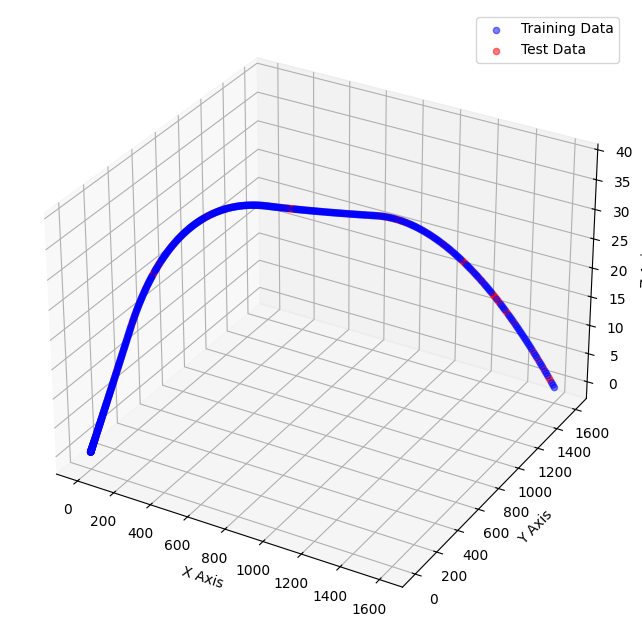

In [90]:

def plot_predictions(train_data=train_coordinates_tensor,  
                     test_data=test_coordinates_tensor,  
                     predictions=None):  
    """  
    Plots training data and test data in 3D space.  
    """  
    fig = plt.figure(figsize=(10, 8))  
    ax = fig.add_subplot(111, projection='3d')  
  
    # 确保PyTorch张量在CPU上  
    train_data = train_data.cpu() if train_data.is_cuda else train_data  
    test_data = test_data.cpu() if test_data.is_cuda else test_data  
  
    # 绘制训练数据（蓝色）  
    ax.scatter(train_data[:, 0], train_data[:, 1], train_data[:, 2], label='Training Data', color='b', alpha=0.5)  
  
    # 绘制测试数据（红色）  
    ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], label='Test Data', color='r', alpha=0.5)  
  
    # 添加图例  
    ax.legend()  
  
    # 设置坐标轴标签  
    ax.set_xlabel('X Axis')  
    ax.set_ylabel('Y Axis')  
    ax.set_zlabel('Z Axis')  
  
    # 显示图形  
    plt.show()  
  
# 调用函数来可视化数据  
plot_predictions(train_data=train_coordinates_tensor, test_data=test_coordinates_tensor)

In [91]:
# create a linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim=3,output_dim=1):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    # 前向传播
    def forward(self,train_coordinates):
         return self.linear(train_coordinates)

In [92]:
# 实例化模型  
model = LinearRegressionModel()  
  
# 打印模型的所有参数  
for name, param in model.named_parameters():  
    print(name, param.data)

linear.weight tensor([[ 0.4414,  0.4792, -0.1353]])
linear.bias tensor([0.5304])


In [93]:
# 查看当前模型状态
model.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.4414,  0.4792, -0.1353]])),
             ('linear.bias', tensor([0.5304]))])

In [94]:
# 使用torch,inference_model()进行预测
with torch.inference_mode():
   predictions = model(test_coordinates_tensor) 

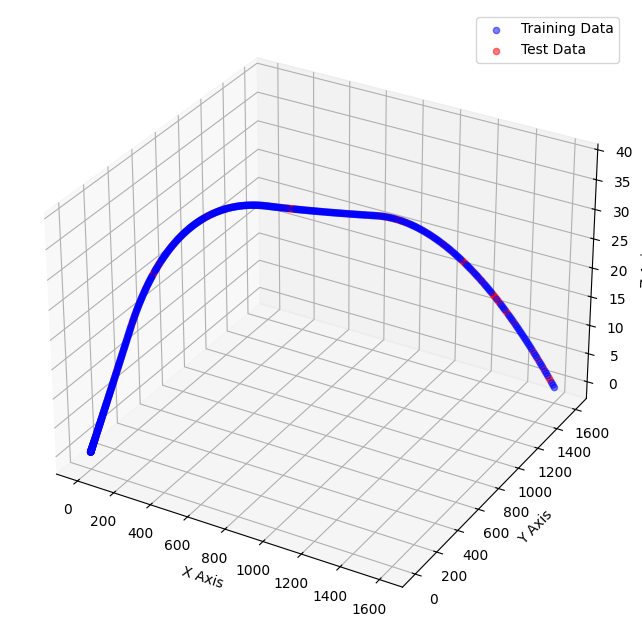

In [95]:
plot_predictions(train_data=train_coordinates_tensor, test_data=test_coordinates_tensor)

In [96]:
# 创建损失函数
loss_fn = nn.L1Loss()
# 创建优化器
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [98]:
# 创建训练循环与测试循环

torch.manual_seed(42)
epochs = 637

train_loss_values = []
test_loss_values =[]
epoch_count = []

for epoch in range(epochs):
    # Training
    model.train()
    predictions = model(train_coordinates_tensor)
    loss = loss_fn(predictions,train_coordinates_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing
    model.eval()
    with torch.inference_mode():
        test_predictions = model(test_coordinates_tensor)
        test_loss = loss_fn(test_predictions,test_coordinates_tensor.type(torch.float))
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch:{epoch}|MAE Train Loss:{loss} |MAE Teat Loss:{test_loss}")           

Epoch:0|MAE Train Loss:1902.8128662109375 |MAE Teat Loss:3534.5859375
Epoch:10|MAE Train Loss:1902.7998046875 |MAE Teat Loss:3534.599365234375
Epoch:20|MAE Train Loss:1902.786865234375 |MAE Teat Loss:3534.612548828125
Epoch:30|MAE Train Loss:1902.773681640625 |MAE Teat Loss:3534.6259765625
Epoch:40|MAE Train Loss:1902.7608642578125 |MAE Teat Loss:3534.639404296875
Epoch:50|MAE Train Loss:1902.7479248046875 |MAE Teat Loss:3534.653076171875
Epoch:60|MAE Train Loss:1902.7347412109375 |MAE Teat Loss:3534.666015625
Epoch:70|MAE Train Loss:1902.7216796875 |MAE Teat Loss:3534.678955078125
Epoch:80|MAE Train Loss:1902.7086181640625 |MAE Teat Loss:3534.692626953125
Epoch:90|MAE Train Loss:1902.6954345703125 |MAE Teat Loss:3534.705810546875
Epoch:100|MAE Train Loss:1902.6827392578125 |MAE Teat Loss:3534.719482421875
Epoch:110|MAE Train Loss:1902.66943359375 |MAE Teat Loss:3534.733154296875
Epoch:120|MAE Train Loss:1902.6563720703125 |MAE Teat Loss:3534.745849609375
Epoch:130|MAE Train Loss:1902.

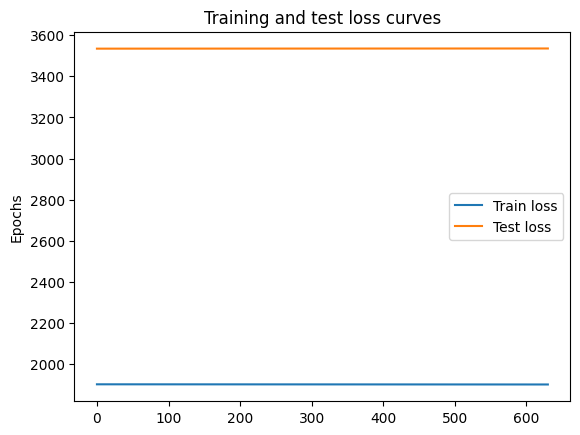

In [99]:
# 查看损失曲线
plt.plot(epoch_count,train_loss_values, label="Train loss")
plt.plot(epoch_count,test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.ylabel("Epochs")
plt.legend()

In [100]:
print("The model learned the following value for weights and bias :")
print(model.state_dict())

The model learned the following value for weights and bias :
OrderedDict([('linear.weight', tensor([[-3.0094, -2.9716, -0.2883]])), ('linear.bias', tensor([0.4347]))])


In [101]:
# 访问权重和偏置：  
for name, param in model.named_parameters():  
    if 'weight' in name:  
        print(f"Weight: {param.data}")  
    elif 'bias' in name:  
        print(f"Bias: {param.data}")

Weight: tensor([[-3.0094, -2.9716, -0.2883]])
Bias: tensor([0.4347])


In [104]:
# 模型预测
model.eval()

with torch.inference_mode():
    predictions = model(test_coordinates_tensor)
predictions

tensor([[-1.5007e+03],
        [-1.1486e+03],
        [-2.0666e+01],
        [-5.9755e+03],
        [-5.8757e+03],
        [-1.9344e+01],
        [-9.3237e+03],
        [-2.6281e+02],
        [-1.3518e+03],
        [-6.3557e+03],
        [-7.1183e+03],
        [-8.3170e+03],
        [-8.0025e+03],
        [-6.9309e+03],
        [-6.7719e+03],
        [-4.7721e+03],
        [-1.0002e+03],
        [-4.3847e+03],
        [-1.3742e+03],
        [-3.8397e+03],
        [-5.1837e+01],
        [ 3.0768e-01],
        [-2.3829e+03],
        [-3.9571e+03],
        [-6.5346e+01],
        [-1.8229e+03],
        [-9.0705e+02],
        [-2.7408e+03],
        [-1.7553e+02],
        [-3.9967e+03],
        [-8.4908e+03],
        [-1.7969e+03],
        [-5.9577e+02],
        [-1.4559e+02],
        [-1.2500e+02],
        [-1.4540e+03],
        [-2.5976e+03],
        [-1.3629e+03],
        [-6.1771e+03],
        [-9.2025e+03],
        [-2.0651e+03],
        [-9.4762e+03],
        [-1.9826e+03],
        [-6

In [110]:
predictions = model(test_coordinates_tensor)  # 举例的维度，随机初始化  
  
# 将PyTorch张量转换为NumPy数组  
predictions_np = predictions.detach().cpu().numpy()  
print(predictions_np) 
print("Shape of predictions_np:", predictions_np.shape) 

[[-1.50069202e+03]
 [-1.14856934e+03]
 [-2.06657753e+01]
 [-5.97551758e+03]
 [-5.87574951e+03]
 [-1.93436565e+01]
 [-9.32368262e+03]
 [-2.62807220e+02]
 [-1.35177527e+03]
 [-6.35572852e+03]
 [-7.11830420e+03]
 [-8.31701465e+03]
 [-8.00253369e+03]
 [-6.93088867e+03]
 [-6.77194727e+03]
 [-4.77207373e+03]
 [-1.00015375e+03]
 [-4.38471680e+03]
 [-1.37416089e+03]
 [-3.83973438e+03]
 [-5.18373642e+01]
 [ 3.07676911e-01]
 [-2.38285962e+03]
 [-3.95713208e+03]
 [-6.53457565e+01]
 [-1.82287061e+03]
 [-9.07050049e+02]
 [-2.74076123e+03]
 [-1.75530685e+02]
 [-3.99673389e+03]
 [-8.49084473e+03]
 [-1.79692725e+03]
 [-5.95765259e+02]
 [-1.45594376e+02]
 [-1.24996513e+02]
 [-1.45401196e+03]
 [-2.59755786e+03]
 [-1.36294421e+03]
 [-6.17709863e+03]
 [-9.20250879e+03]
 [-2.06513623e+03]
 [-9.47618652e+03]
 [-1.98262122e+03]
 [-6.02565674e+03]
 [-7.61010645e+03]
 [-2.41293237e+03]
 [-4.09676807e+03]
 [-1.02967308e+02]
 [-3.27923851e+01]
 [-4.11695117e+03]
 [-7.55475586e+03]
 [-4.54936713e-01]
 [-2.4889858

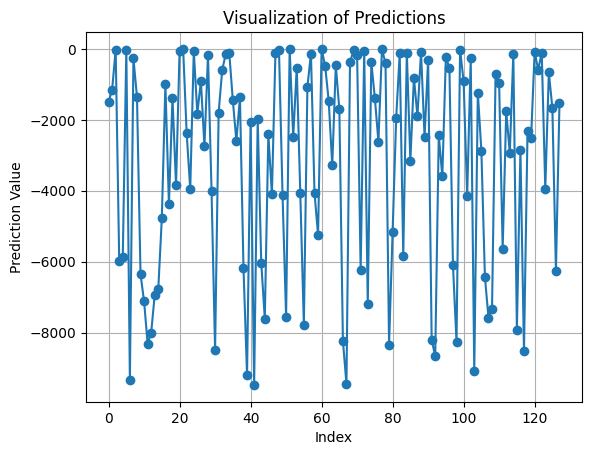

In [111]:
predictions_1d = predictions_np.ravel()  
predictions_1d = predictions_np.ravel()  
  
# 创建一个x轴的范围，通常是从0到数组的长度减1  
x = np.arange(len(predictions_1d))  
  
# 使用matplotlib绘制线图  
plt.plot(x, predictions_1d, marker='o')  # marker='o'表示在每个数据点上添加一个圆圈  
plt.title('Visualization of Predictions')  
plt.xlabel('Index')  
plt.ylabel('Prediction Value')  
plt.grid(True)  # 可选：添加网格线  
plt.show()

In [ ]:
# 保存和加载模型
